# Lab 1 - Data Visualization - 21KHDL

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

# 🚢 Titanic - 📊 Data Analytics

<img src= "https://img.freepik.com/free-vector/shipwreck-accident-ship-run-aground-sink-ocean_33099-2210.jpg?w=996&t=st=1659906434~exp=1659907034~hmac=c827b8572afc69ebb3bef97a68cb197ef3efcdc5c39b6f8857cb8f8245a19913" alt ="Titanic" style='width: 75%; margin-left: 12.5%
'>

# Dataset Description ⛳

Overview
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

`The training set` should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

`The test set` should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


# About the given Datasets 📁📂

#### What is the meaning of each column?
There are total of __10__ columns in our dataset represent 10 features of each passenger, include:

| # | Field Name | Description |
|---|------------|-------------|
| 1 | `survival` | Indicates if the passenger survived the ship wreck |
| 2 | `pclass` | Indicates the socio-economic status of the given passanger (1st = Upper, 2nd = Middle, 3rd = Lower) |
| 3 | `sex` | Male or Female |
| 4 | `Age` | The age of the passenger |
| 5 | `sibsp` | The number of siblings / spouses of the passanger that are on-board |
| 6 | `parch` | The number of parents /  children that are on-board |
| 7 | `ticket` | Ticket number, which is the unique identifier of each passanger. |
| 8 | `fare` | How much the passanger has paid in total |
| 9 | `cabin` | How much the passanger has paid in total |
| 10 | `Embarked` | Which port the passanger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton) |

# Table of Contents

1. [Import all the necessary libraries](#1.-Import-all-the-necessary-libraries)
2. [Basic Data Exploration](#2.-Basic-Data-Exploration)
3. [Numerical Feature Analysis](#3.-Numerical-Feature-Analysis)
   - 3.1 [Statistical Analysis](#3.1.-Statistical-Analysis)
   - 3.2 [Univariate Analysis](#3.2.-Univariate-Analysis)
4. [Categorical Feature Analysis](#4.-Categorical-Feature-Analysis)
5. [Numerical & Categorical Multivariate Analysis](#5.-Numerical-&-Categorical-Multivariate-Analysis)
6. [References](#6.-References)


### 1. Import necessary libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from termcolor import colored

sns.set(style="darkgrid", palette="muted", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

### 2. Basic Data Exploration

In [26]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [27]:
print(f'The Training Dataset contains, Rows: {train_df.shape[0]} & Columns: {train_df.shape[1]}')
print(f'The Test Dataset contains, Rows: {test_df.shape[0]} & Columns: {test_df.shape[1]}')

The Training Dataset contains, Rows: 891 & Columns: 12
The Test Dataset contains, Rows: 418 & Columns: 11


In [28]:
# basic information about the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# Check first 5 entries of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Numerical Features Analysis

In [30]:
# create a list of all numercial features
numeric_features = train_df.select_dtypes(exclude=['object']).columns
numeric_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [31]:
# create the dataframe of all numerical features
numeric_df = train_df[numeric_features]

#### 3.1 Statistical Analysis

In [32]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Heatmap

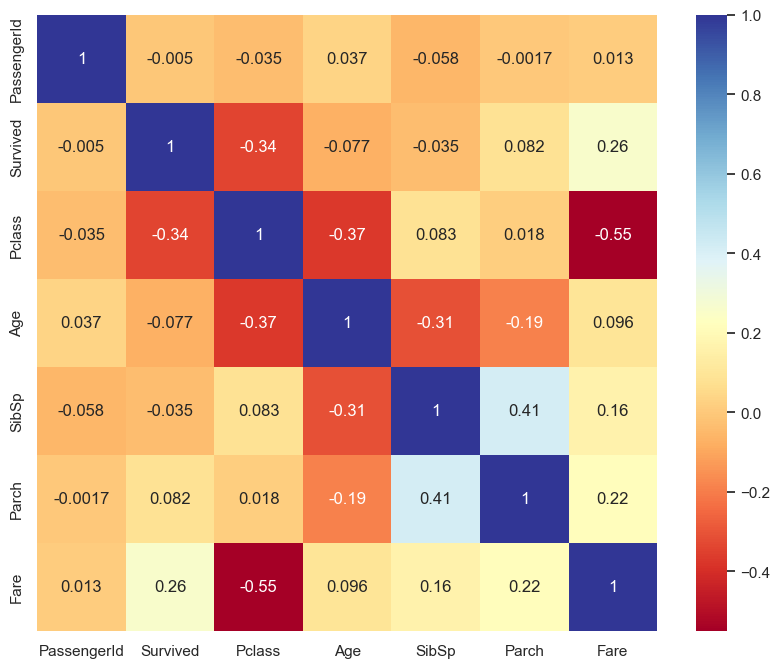

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlBu');

In [34]:
numeric_features_correlation_df = pd.DataFrame(numeric_df.corr().Survived)
abs(numeric_features_correlation_df).sort_values(by='Survived', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


**Comment:** 
- `Pclass` or Passenger Class" is the numerical feature that is most strongly correlated with the `Survived` attribute compared to other numerical features.
- The `Pclass/Passenger Class` and `Fare"` features exhibit a significant negative correlation value (`-0.55`), which aligns with our expectations.
- `SibSp` and `Parch`, these two features, show a significant positive correlation value (0.41).
- The `PassengerId` feature does not exhibit any meaningful correlation with any other features.

#### 3.2 Univariate Analysis

##### Survived (Target Attribute)

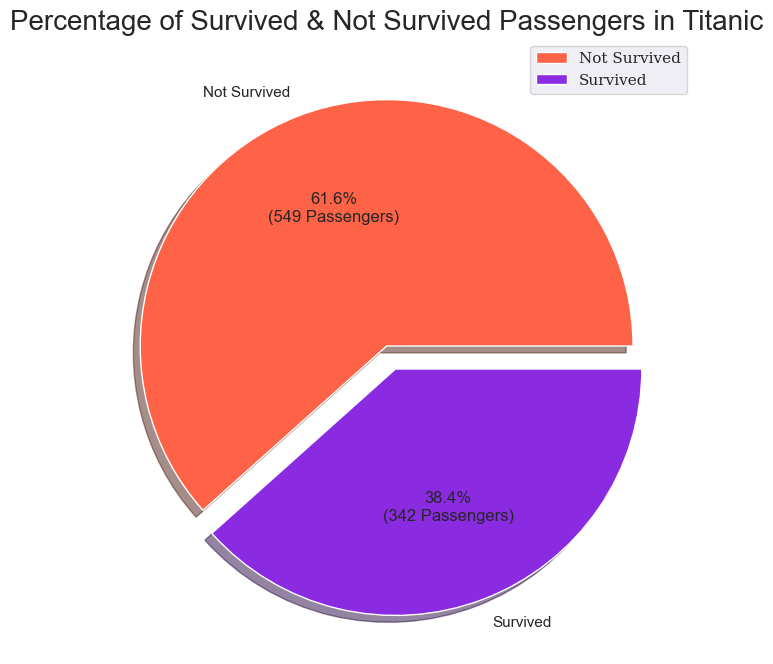

In [35]:
size = list(numeric_df['Survived'].value_counts())
labels = ['Not Survived', 'Survived']
colors = ['tomato', 'blueviolet']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Survived & Not Survived Passengers in Titanic', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend()
plt.show()

**Comment:** 
- From the above figure, we can observe that the majority of the passengers (`61.6%`) on the Titanic did `not survive`.
- Only `38.4%` of passengers were able to `survive`.

##### Pclass or Passesnger Class

**Question**: 
>**What is the distribution of passengers across different fare classes on the Titanic, and how does it vary?** 

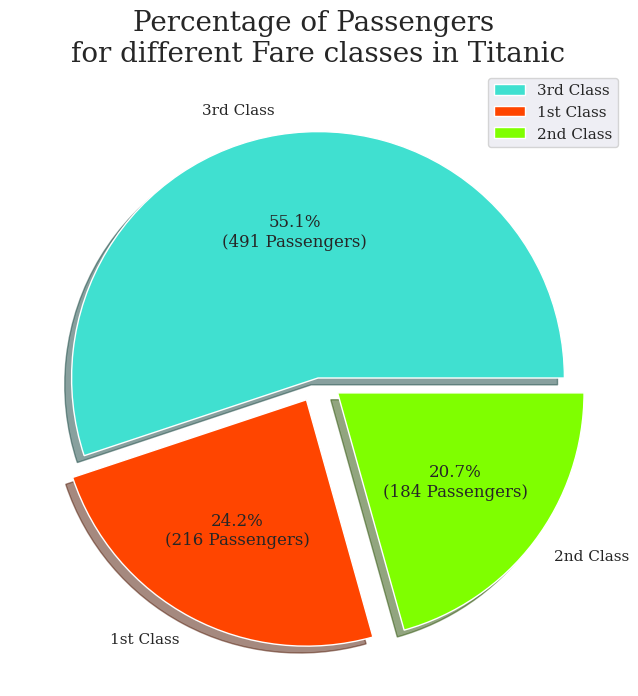

In [36]:
size = list(numeric_df['Pclass'].value_counts())
labels = ['3rd Class', '1st Class', '2nd Class']
colors = ['turquoise', 'orangered', 'chartreuse']
explode = [0, 0.1, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Passengers \nfor different Fare classes in Titanic', fontsize = 20)
plt.legend()
plt.show()

**Comment:** 
- We can see that most of the passengers (`55.1%`) on the Titanic were traveling in Economy (`3rd`) Class.
- `24.2%` and `20.7%` of passengers on the Titanic were traveling in Premium (`1st`) and Middle (`2nd`) Class respectively.

Let's define `bar_plot`, creates  a bar plot to visualize the distribution of categorical data. It allow for comparison between different categories or groups.

In [37]:
def bar_plot(attribute, data, color, title, size, space, comparison = None, comparison_order=None):
    plt.figure(figsize=size)
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, hue_order=comparison_order, data = data, palette=color)
    total = len(data)
    
    for i in ax.patches:
        percentage = ' '*space + '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)


**Question**: 
>**How does the distribution of passengers across different fare classes vary based on their survival status?** 

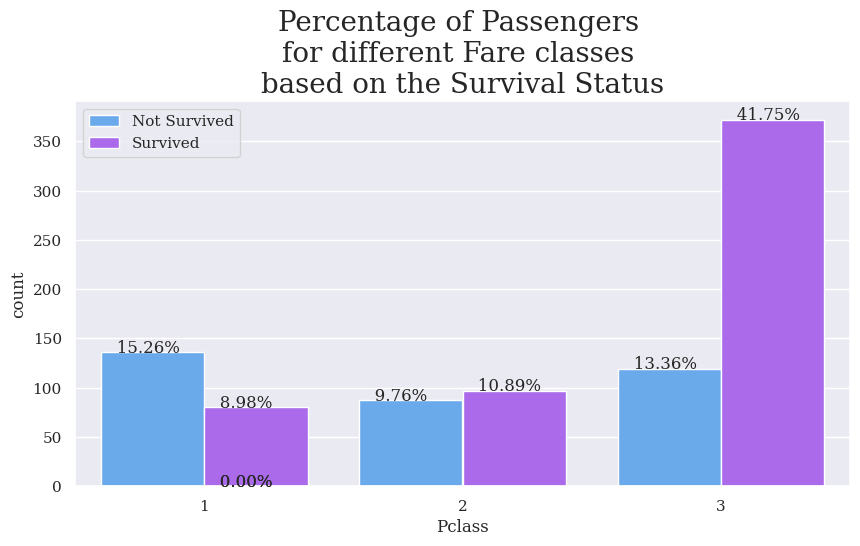

In [38]:
new_numeric_df = numeric_df
new_numeric_df['Survived'] = new_numeric_df['Survived'].astype(str)
bar_plot('Pclass', new_numeric_df, 'cool', 
         "Percentage of Passengers \nfor different Fare classes \nbased on the Survival Status", 
         (10, 5), 3, 'Survived')

plt.legend(loc='upper left', labels=['Not Survived', 'Survived']);

**Comment:** 
- From the above figure, it is inferred that the majority of the passengers (`41.75%`) who were traveling in Economy (`3rd`) Class on the Titanic were `not able to survive`.

**Question**: 
>**How does the survival rate vary across different passenger classes on the Titanic?** 

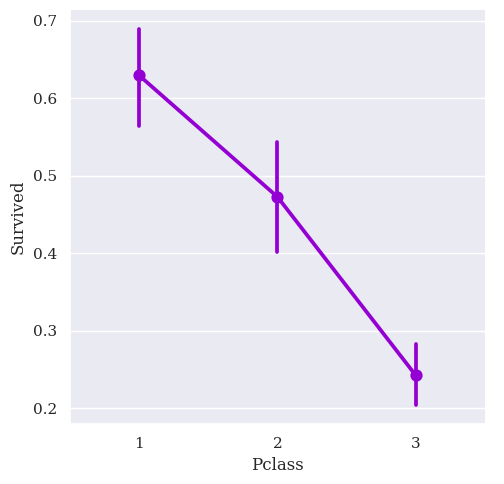

In [39]:
numeric_df['Survived'] = pd.to_numeric(numeric_df['Survived'], errors='coerce')
sns.catplot(x='Pclass', y='Survived', data=numeric_df, kind='point', color='darkviolet');

**Comment:** 
- The survival rate of Premium (`1st`) Class passengers is higher than the survival rate of passengers in the other two passenger classes.
- The passengers of Economy (`3rd`) Class had the lowest survival rate.

##### Fare

**Question**: 
>**How does the fare distribution differ between passengers who survived and those who did not on the Titanic?** 

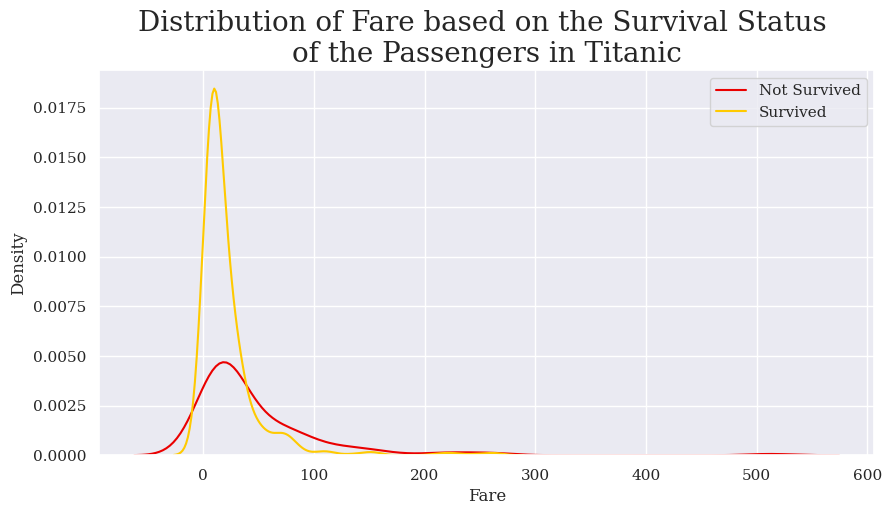

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=numeric_df, x='Fare', hue='Survived', palette="hot_r");
plt.title("Distribution of Fare based on the Survival Status \nof the Passengers in Titanic", fontsize = 20);

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

**Question**: 
>**What is the average fare paid by passengers in each class on the Titanic, and how does it differ across different classes?** 

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


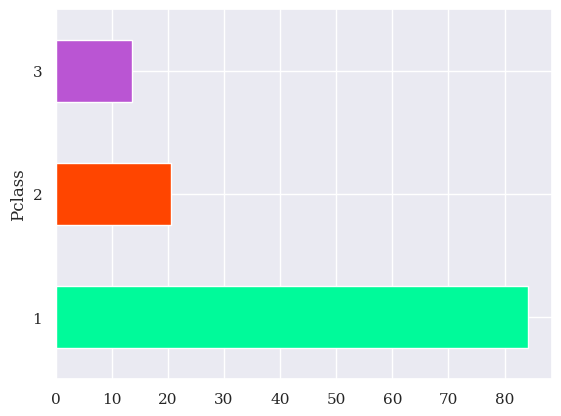

In [41]:
print(numeric_df.groupby('Pclass')['Fare'].mean())
numeric_df.groupby('Pclass')['Fare'].mean().plot.barh(color=['mediumspringgreen', 'orangered', 'mediumorchid']);

**Comment:** 
- The average fare of `1st, 2nd, and 3rd` Passenger Class is `84, 20, and 13` dollars respectively.

##### Age

**Question**: 
>**How does the age distribution differ between passengers who survived and those who did not on the Titanic, and what are the descriptive statistics for age within each survival group?** 

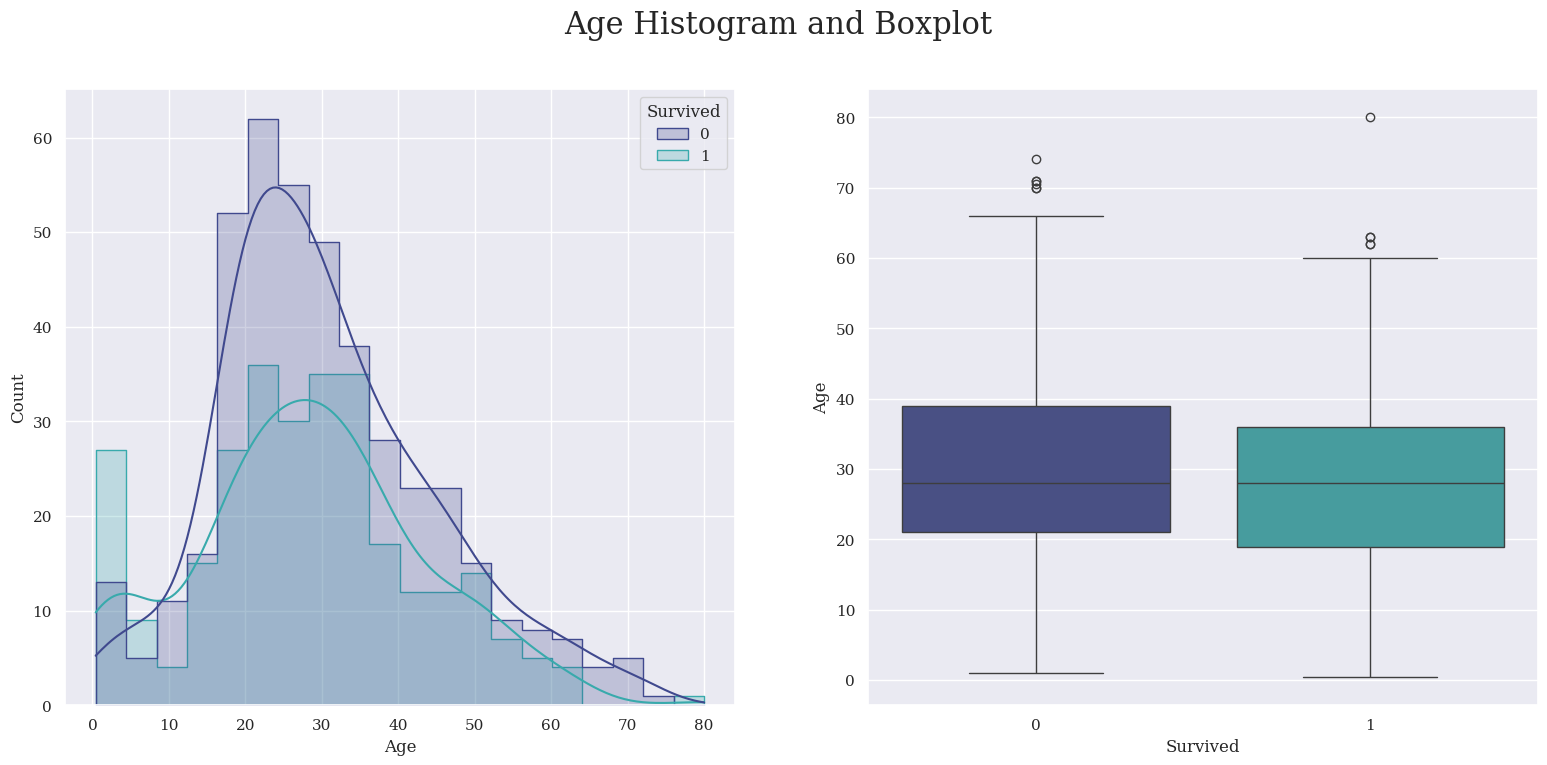

Age Min, Mean and Max:
	Survived == 1
	Age Minimum:  0.42
	Age Mean: 28.343689655172415
	Age Maximum: 80.0 

	Survived == 0
	Age Minimum:  1.0
	Age Mean: 30.62617924528302
	Age Maximum: 74.0


In [42]:
train_df['Survived'] = train_df['Survived'].astype('int')
fig, ax = plt.subplots(1, 2, figsize=(19,8))
fig.suptitle('Age Histogram and Boxplot', size=22)
sns.histplot(x='Age', data=train_df, hue='Survived', palette='mako', kde=True, element='step', ax=ax[0])
sns.boxplot(x='Survived', y='Age', data=train_df, palette='mako', ax=ax[1])
plt.show()

print(colored("Age Min, Mean and Max:", 'green', attrs=['underline', 'bold']))

survived_1 = train_df[train_df['Survived']==1]['Age']
survived_0 = train_df[train_df['Survived']==0]['Age']

print(colored("\tSurvived == 1", 'magenta', attrs=['bold']))
print('\tAge Minimum: ', colored(survived_1.describe()['min'], "cyan", attrs=['bold']))
print('\tAge Mean:', colored(survived_1.describe()['mean'], "cyan", attrs=['bold']))
print('\tAge Maximum:', colored(survived_1.describe()['max'], "cyan", attrs=['bold']), '\n')

print(colored("\tSurvived == 0", 'magenta', attrs=['bold']))
print('\tAge Minimum: ', colored(survived_0.describe()['min'], "cyan", attrs=['bold']))
print('\tAge Mean:', colored(survived_0.describe()['mean'], "cyan", attrs=['bold']))
print('\tAge Maximum:', colored(survived_0.describe()['max'], "cyan", attrs=['bold']))

**Comment:** 
- The mean age for passengers that survived is lower.
- A lower age exhibits a positive correlation with survival.

### 4. Categorical Feature Analysis

##### Sex

In this section we need to creates a `horizontal bar plot` to visualize the distribution of a categorical feature in a DataFrame. It allows for optional differentiation by a hue category. 

In [43]:
def horizontal_bar_plot(feature, dataframe, color, title, adjust, figsize, hue=None):
  # Create barplot 
  plt.figure(figsize=figsize)

  if hue == None:
    ax = sns.countplot(y=feature, data=dataframe, palette=color)
  else:
    ax = sns.countplot(y=feature, data=dataframe, palette=color, hue=hue)

  # Annotate every single Bar with its value, based on it's width           
  for p in ax.patches:
      width = p.get_width()
      plt.text(p.get_width()+adjust[0], p.get_y()+adjust[1]*p.get_height(),
              '{} Passesngers\n[{:.2f}%]'.format(int(width), width*100/train_df[feature].shape[0]),
              ha='center', va='center')
      
  plt.title(title, fontsize=23);

**Question**: 
>**What is the distribution of passengers by sex on the Titanic, and how many male and female passengers are there in the dataset?** 

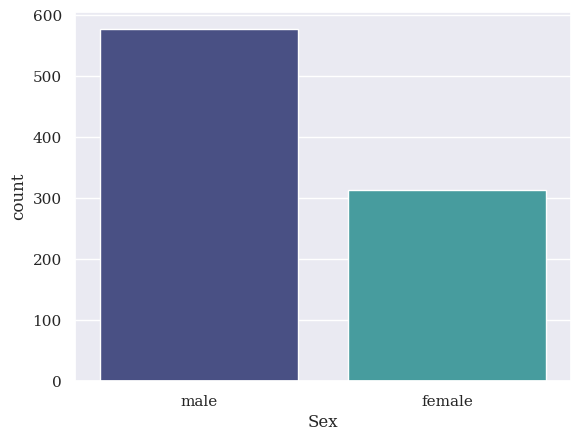

PASSENGER CLASS COUNTS:

Male Passengers: 577 

Female Passengers: 314 



In [44]:
sns.countplot(x='Sex', data=train_df, palette='mako')
plt.show()
print(colored("PASSENGER CLASS COUNTS:\n", 'magenta', attrs=['bold', 'underline']))
print(colored(f"Male Passengers: {train_df[train_df['Sex']=='male'].count()[0]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Female Passengers: {train_df[train_df['Sex']=='female'].count()[0]}", "cyan", attrs=['bold']),'\n')

##### Male and Female Survival count

**Question**: 
>**How does the count of passengers who survived and did not survive vary based on sex on the Titanic, and what are the specific counts for male and female passengers in each survival category?** 

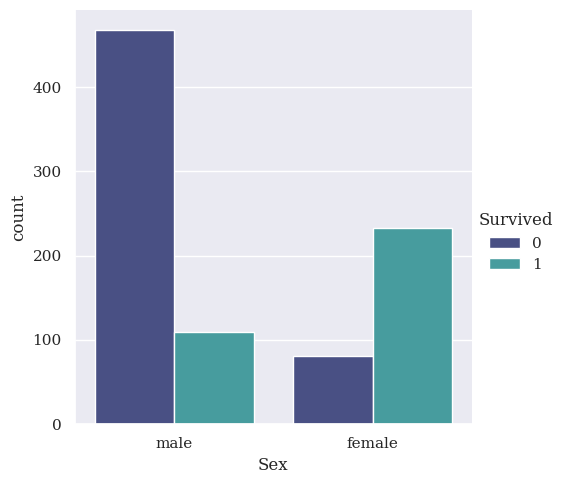

PASSENGER CLASS SURVIVED BASED ON SEX:

SURVIVED 

Male Passengers: 109 

Female Passengers: 233 

DIDN'T SURVIVE 

Male Passengers: 468 

Second Class Passengers: 81 



In [45]:
train_df['Survived'] = train_df['Survived'].astype('str')
sns.catplot(x="Sex",  kind="count", hue='Survived', data=train_df, palette='mako')
plt.show()
SURVIVED_SEX_LIST = train_df.value_counts(["Sex", "Survived"], sort=False).to_numpy()
print(colored("PASSENGER CLASS SURVIVED BASED ON SEX:\n", 'magenta', attrs=['bold', 'underline']))
# Passengers that survived
print(colored(f"SURVIVED", "green", attrs=['bold']),'\n')
print(colored(f"Male Passengers: {SURVIVED_SEX_LIST[3]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Female Passengers: {SURVIVED_SEX_LIST[1]}", "cyan", attrs=['bold']),'\n')
# Passengers that didn't survive
print(colored(f"DIDN'T SURVIVE", "red", attrs=['bold']),'\n')
print(colored(f"Male Passengers: {SURVIVED_SEX_LIST[2]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Second Class Passengers: {SURVIVED_SEX_LIST[0]}", "cyan", attrs=['bold']),'\n')

### 5. Numerical & Categorical Multivariate Analysis

##### Embarked-Pclass-Sex-Survived

**Question**: 
>**What is the relationship between the port of embarkation, passenger class, and survival rate based on gender aboard the Titanic, and how does this relationship vary across different embarkation ports and passenger classes?**

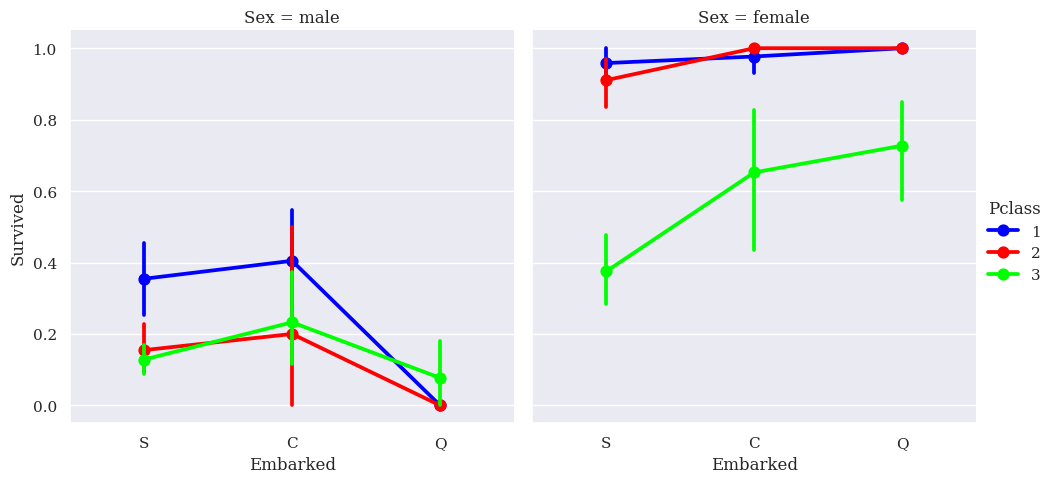

In [46]:
train_df['Survived'] = pd.to_numeric(train_df['Survived'], errors='coerce')
sns.catplot(x="Embarked", y='Survived', hue="Pclass", col="Sex", data=train_df, kind="point", palette='brg');

**Comment:** 
- The female passengers who embarked from `Cherbourg` Port and belonged to the Premium (`1st`) Class on the Titanic had the highest survival rate.
- The male passengers who embarked from `Queenstown` Port and belonged to Economy (`3rd`) Class on the Titanic had the least survival rate."

##### Age-Embarked-Pclass-Sex-Survived

**Question**: 
>**What is the relationship between age, survival rate, and passenger class among male and female passengers aboard the Titanic, and how does this relationship vary across different age groups and passenger classes?** 

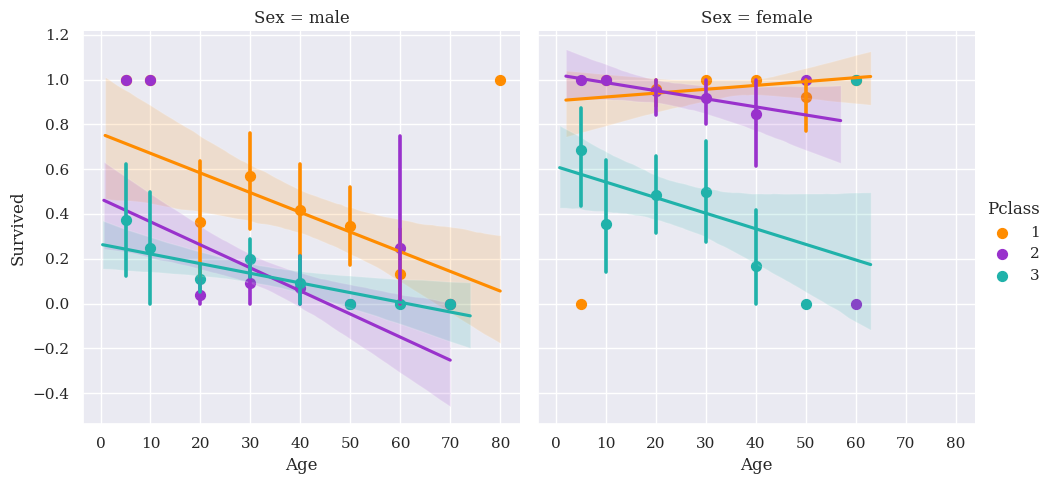

In [47]:
generations = [5, 10, 20, 30, 40, 50, 60, 70 , 80]
sns.lmplot(x="Age", y="Survived",
            hue="Pclass", col="Sex",
            data=train_df,
            palette=["darkorange","darkorchid","lightseagreen"], x_bins=generations);

**Comments**: 
- As the age increases, passenger's survival rate also decreases for all kinds of passengers except for the female passengers of premium (`1st`) class.
- The females, males, and children of premium (`1st`) class had higher survival rates than other classes.
- In economy (`3rd`) class, more children had survived.
- The old-age female passengers of premium (`1st`) class had the highest survival rate.
- The old-age male passengers of economy (`3rd`) class had the least survival rate.

### 6. References

[1] [Titanic dataset source kaggle](https://www.kaggle.com/competitions/titanic)

[2] https://www.kaggle.com/code/petraneumann/data-analysis-titanic-data-python

[3] https://www.kaggle.com/code/alexisbcook/titanic-tutorial

[4] https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

[5] [Storytelling with data book](https://github.com/Saurav6789/Books-/blob/master/storytelling-with-data-cole-nussbaumer-knaflic.pdf)

---
## <center>THE END</center>

## <center>THANK YOU</center>